In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_path_normal = "/content/drive/MyDrive/chest_xray/train/NORMAL/"
train_path_pneumonia = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA/"
test_path_normal = "/content/drive/MyDrive/chest_xray/test/NORMAL/"
test_path_pneumonia = "/content/drive/MyDrive/chest_xray/test/PNEUMONIA/"
val_path_normal = "/content/drive/MyDrive/chest_xray/val/NORMAL/"
val_path_pneumonia = "/content/drive/MyDrive/chest_xray/val/PNEUMONIA/"

X_train = []
y_train = []
for filename in os.listdir(train_path_normal):
    if filename.endswith(".jpeg"):
        img = image.load_img(train_path_normal+filename, target_size=(224, 224))
        X_train.append(image.img_to_array(img))
        y_train.append(0)


for filename in os.listdir(train_path_pneumonia):
    if filename.endswith(".jpeg"):
        img = image.load_img(train_path_pneumonia+filename, target_size=(224, 224))
        X_train.append(image.img_to_array(img))
        y_train.append(1)

X_train = np.array(X_train)
y_train = np.array(y_train, dtype = 'uint8')

X_test = []
y_test = []
for filename in os.listdir(test_path_normal):
    if filename.endswith(".jpeg"):
        img = image.load_img(test_path_normal+filename, target_size=(224, 224))
        X_test.append(image.img_to_array(img))
        y_test.append(0)
        
for filename in os.listdir(test_path_pneumonia):
    if filename.endswith(".jpeg"):
        img = image.load_img(test_path_pneumonia+filename, target_size=(224, 224))
        X_test.append(image.img_to_array(img))
        y_test.append(1)
        
X_test = np.array(X_test)
y_test = np.array(y_test, dtype = 'uint8')

X_valid = []
y_valid = []
for filename in os.listdir(val_path_normal):
    if filename.endswith(".jpeg"):
        img = image.load_img(val_path_normal+filename, target_size=(224, 224))
        X_valid.append(image.img_to_array(img))
        y_valid.append(0)
        
for filename in os.listdir(val_path_pneumonia):
    if filename.endswith(".jpeg"):
        img = image.load_img(val_path_pneumonia+filename, target_size=(224, 224))
        X_valid.append(image.img_to_array(img))
        y_valid.append(1)
        
X_valid = np.array(X_valid)
y_valid = np.array(y_valid, dtype = 'uint8')

In [4]:
X_train = np.array(X_train) / 255
X_valid = np.array(X_valid) / 255
X_test = np.array(X_test) / 255

In [6]:
y_train.shape

(5216,)

In [7]:
y_test.shape

(624,)

In [8]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))
y_valid = np.reshape(y_valid, (-1,1))

In [9]:
from keras.utils import normalize, to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

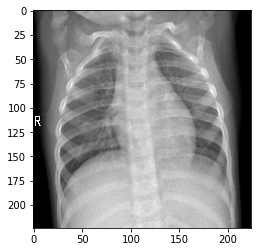

In [11]:
plt.imshow(X_train[11])

In [14]:
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

In [16]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 2 , activation = 'sigmoid'))


model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

In [18]:
history = model.fit(X_train, y_train,
                shuffle=True,
                batch_size = 64,
                epochs = 12,
                validation_data = (X_valid, y_valid)
                )

Epoch 1/12
82/82 [==============================] - 36s 151ms/step - loss: 2.7573 - accuracy: 0.8641 - val_loss: 27.2164 - val_accuracy: 0.5000
Epoch 2/12
82/82 [==============================] - 11s 134ms/step - loss: 0.1724 - accuracy: 0.9364 - val_loss: 56.6642 - val_accuracy: 0.5000
Epoch 3/12
82/82 [==============================] - 11s 134ms/step - loss: 0.1171 - accuracy: 0.9579 - val_loss: 53.3422 - val_accuracy: 0.5000
Epoch 4/12
82/82 [==============================] - 11s 134ms/step - loss: 0.0782 - accuracy: 0.9753 - val_loss: 48.3237 - val_accuracy: 0.5000
Epoch 5/12
82/82 [==============================] - 11s 134ms/step - loss: 0.0589 - accuracy: 0.9801 - val_loss: 35.0648 - val_accuracy: 0.5000
Epoch 6/12
82/82 [==============================] - 11s 134ms/step - loss: 0.0701 - accuracy: 0.9811 - val_loss: 23.8376 - val_accuracy: 0.5000
Epoch 7/12
82/82 [==============================] - 11s 134ms/step - loss: 0.0536 - accuracy: 0.9838 - val_loss: 16.4925 - val_accuracy:

In [19]:
y_test.shape

(624, 2)

In [20]:
model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 21ms/step - loss: 1.5527 - accuracy: 0.8638


[1.5527018308639526, 0.8637820482254028]

In [21]:
predictions = model.predict(X_test)
rounded_labels = np.argmax(predictions, axis=1)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(np.argmax(y_test, axis = 1), rounded_labels))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       234
           1       0.84      0.97      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.83      0.84       624
weighted avg       0.87      0.86      0.86       624



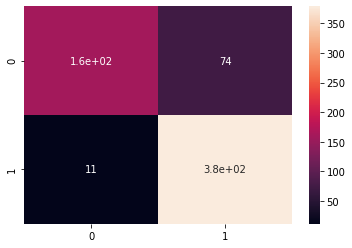

In [23]:
import seaborn as sns
cm = confusion_matrix(np.argmax(y_test, axis = 1), rounded_labels)
sns.heatmap(cm, annot = True)

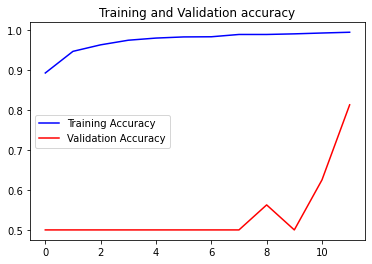

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
#fig = plt.figure()

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

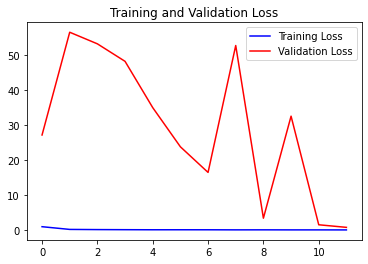

In [25]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()